#### Python libraries

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
print(keras.__version__)

from tensorflow.keras import layers, models, Model, applications
import matplotlib.pyplot as plt
import numpy as np

2.4.1
2.4.0


#### Mounting GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Extract data from folders

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import preprocess_input

path = '/content/drive/Shareddrives/SeniorDesign2020/Algorithm/ai_dataset/'
num_of_classes = 4

train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function = preprocess_input
    )

train_generator = train_datagen.flow_from_directory(
    directory=path+'training',
    target_size=(320,320),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
  )


test_datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input
    )

test_generator = test_datagen.flow_from_directory(
    directory=path+'testing',
    target_size=(320,320),
    class_mode='categorical',
    shuffle=False
  )

Found 4375 images belonging to 4 classes.
Found 1263 images belonging to 4 classes.


In [ ]:
print(train_generator.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3}


In [ ]:
# model = models.Sequential()

# model.add(layers.Conv2D(64, 3, input_shape=(320,320,3)))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D((2,2,)))

# model.add(layers.Conv2D(128, 3))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D((2,2,)))

# model.add(layers.Conv2D(128, 3))
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPooling2D((2,2,)))

# model.add(layers.Fla



# model.add(layers.Dense(64))
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.7))
# model.add(layers.Dense(num_of_classes))
# model.add(layers.Dropout(0.5))
# model.add(layers.Activation('softmax'))
## --------------------------------------------------------

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(320,320,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_of_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
optim = tf.keras.optimizers.Adam(lr=0.001) 

model.compile(optimizer=optim,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=test_generator,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
137/137 [==============================] - 3687s 27s/step - loss: 2.8865 - accuracy: 0.4852 - val_loss: 0.8601 - val_accuracy: 0.6770
Epoch 2/10
137/137 [==============================] - 127s 925ms/step - loss: 0.5536 - accuracy: 0.8186 - val_loss: 0.9145 - val_accuracy: 0.5812
Epoch 3/10
137/137 [==============================] - 125s 913ms/step - loss: 0.4088 - accuracy: 0.8412 - val_loss: 0.4822 - val_accuracy: 0.7807
Epoch 4/10
137/137 [==============================] - 126s 922ms/step - loss: 0.1886 - accuracy: 0.9465 - val_loss: 0.6916 - val_accuracy: 0.7680
Epoch 5/10
137/137 [==============================] - 129s 939ms/step - loss: 0.1422 - accuracy: 0.9610 - val_loss: 0.6718 - val_accuracy: 0.7799
Epoch 6/10
137/137 [==============================] - 125s 912ms/step - loss: 0.1753 - accuracy: 0.9405 - val_loss: 0.3009 - val_accuracy: 0.8757
Epoch 7/10
137/137 [==============================] - 126s 921ms/step - loss: 0.1255 - accuracy: 0.9573 - val_loss: 0.3426 - 

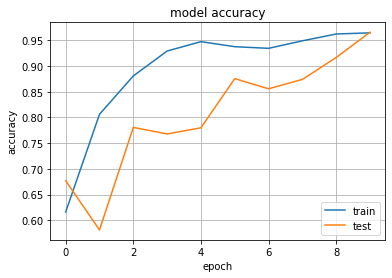

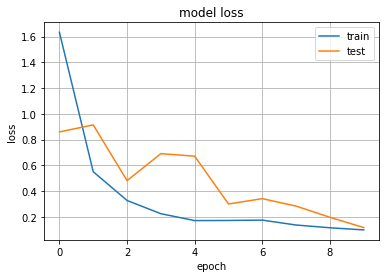

In [ ]:
# summarize history for accuracy
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
# summarize history for loss
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.evaluate(test_generator)
# # bbps_model = model
from sklearn.metrics import classification_report, confusion_matrix


pred_labels = model.predict(test_generator)
y_pred = np.argmax(pred_labels, axis=1)

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

40/40 [==============================] - 11s 274ms/step - loss: 0.1180 - accuracy: 0.9660
Confusion Matrix
[[268   7   0   0]
 [  1 281   4   0]
 [  0  11 396   3]
 [  0   0  17 275]]


### Save Resnet Model

In [ ]:
savepath = '/content/drive/Shareddrives/SeniorDesign2020/Algorithm/'
model.save(savepath + 'models/new_models/resnet50_regression')


INFO:tensorflow:Assets written to: /content/drive/Shareddrives/SeniorDesign2020/Algorithm/models/new_models/resnet50_regression/assets


In [ ]:
model.save(savepath + 'models/new_models/resnet50_regression_h.h5')

In [ ]:

import cv2

img = cv2.imread('/content/drive/Shareddrives/SeniorDesign2020/Algorithm/ai_dataset/testing/2/bowel_15_score_2-0_00000056.jpg')
img = cv2.resize(img, (320,320))
img = np.array([img])

################################################################################
# BBPS Function
# Returns tuple
# First: Regression probability output. Continuous
# Second: Final Classification output. Discrete
'''BBPS SHOULD BE CHANGED TO THIS FOR REGRESSION CLASSIFICATION'''
def BBPSPredict(image):
  #Works if image dim = (1, x, y, z)
  #Can't work if image dim = (x, y, z)
  prob_prediction = model.predict(image)
  expected_value = 0
  for i in range(0, len(prob_prediction[0])):
    expected_value += (i * prob_prediction[0][i])
  return (round(expected_value,3), np.argmax(prob_prediction, axis=1)[0]) 

In [ ]:
BBPSPredict(img)

(2.067, 3)